Dimensión de la matriz cuadrada: 2


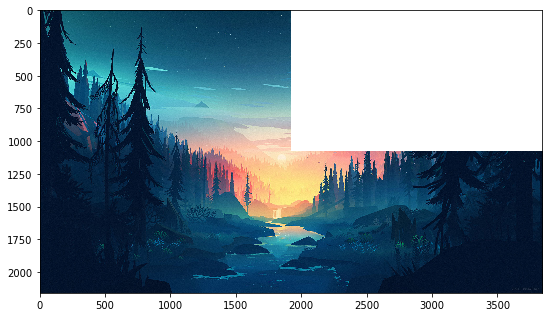

In [153]:
from IPython.display import clear_output 
import matplotlib.pyplot as plt
import numpy as np 
import random
import copy

tablero = np.array([])
posicion_blanco = 0
objetivo = np.array([])

def separar(imagen,cuantas): 
    data = copy.copy(np.vsplit(imagen,cuantas))
    data = [copy.copy(np.hsplit(np.asarray(i),cuantas)) for n,i in enumerate(data)]
    return data 
    
    
def encontrar_blanco(data,cuadro_blanco):
    contador = 0   
    for n,i in enumerate(data):
        for m,j in enumerate(data[n]):
            if (data[n][m] == cuadro_blanco).all():
                return contador
            contador += 1
        

def ubicar_blanco(data,blanco,cuadro_blanco):
    fila = list()
    contador = 0   
    for n,i in enumerate(data):
        columna = list()
        for m,j in enumerate(data[n]):
            data[n][m] = copy.copy(cuadro_blanco) if contador == blanco else data[n][m]
            columna.append(data[n][m]) 
            contador += 1
        fila.append(np.concatenate(columna,axis=1))
    return np.concatenate(fila,axis=0)


def mezclar_unir(a_modificar,original,orden):
    contador = 0
    mezclado = [original[n][m] for n,i in enumerate(original) for m,j in enumerate(original[n])]
    fila = list()
    
    for n,i in enumerate(original):
        columna = list()
        for m,j in enumerate(original):
            a_modificar[n][m] = mezclado[orden[contador]]
            contador += 1
            columna.append(a_modificar[n][m])
        fila.append(np.concatenate(columna,axis=1))
    return np.concatenate(fila,axis=0)


def unir(data):
    fila = list()
    for n,i in enumerate(data):
        columna = list()
        for m,j in enumerate(data[n]):
            columna.append(data[n][m]) 
        fila.append(np.concatenate(columna,axis=1))
    return np.concatenate(fila,axis=0)


def jugar(mover,tablero_, matrix,blanco):
    clear_output()
    if mover in matrix:
        blanco_f, blanco_c = np.where(matrix == blanco)
        blanco_f, blanco_c = [copy.copy(blanco_f[0]),copy.copy(blanco_c[0])]
        
        if mover != blanco:
            mov_f, mov_c = np.where(matrix == mover)
            mov_f, mov_c = [copy.copy(mov_f[0]),copy.copy(mov_c[0])]
            f_arriba = mov_f - 1
            f_abajo = mov_f + 1
            c_izq = mov_c - 1 
            c_der = mov_c + 1

            if ((blanco_f == mov_f) and ((blanco_c == c_izq) or (blanco_c == c_der))) or ((blanco_c == mov_c) and ((blanco_f == f_arriba) or (blanco_f == f_abajo))):
                posicion_aux_blanco = copy.copy(tablero_[blanco_f][blanco_c])
                tablero_[blanco_f][blanco_c] = copy.copy(tablero_[mov_f][mov_c])
                tablero_[mov_f][mov_c] = copy.copy(posicion_aux_blanco)
                blanco = copy.copy(mover)
            else:
                print('Movimiento no permitido')
                blanco = -100
        else:
            print('No se puede mover la pieza en blanco')
            blanco = -200
    else:
        print('Elemento no encontrado')
        blanco = -300
            
    return {"blanco": blanco, "tablero": copy.copy(tablero_)}
     
    
def verificar(tabl, obj):
    return True if (tabl == obj).all() else False

       
def proceso(orden, objetivo, tabl, posicion_blanco, cuantas):
    fin = False
    tablero = copy.copy(tabl)
    while fin == False:
        mover = int(input('Cuál desea mover: '))
        posicion_blanco_aux = copy.copy(posicion_blanco)
        resultado = jugar(mover,tablero,orden,posicion_blanco)
        posicion_blanco = copy.copy(resultado["blanco"])
        tablero_ = copy.copy(resultado["tablero"])
        tablero = unir(tablero_)
        if posicion_blanco >= 0:
            fin = verificar(tablero,objetivo)
        elif posicion_blanco == -100 or posicion_blanco == -200 or posicion_blanco == -300:
            posicion_blanco = copy.copy(posicion_blanco_aux)    

        if fin:
            print('LOGRADO')
            
        plt.imshow(tablero)
        plt.show()
        tablero = separar(tablero,cuantas)
    
################################################

plt.rcParams['figure.figsize'] = (9,7)

original = plt.imread('imagen.jpg')
cuantas = int(input('Dimensión de la matriz cuadrada: '))
piezas = cuantas*cuantas

data = separar(original,cuantas)
altura,largo = [[data[0][0].shape][0][0], [data[0][0].shape][0][1]]   # Obtener dimensiones para el cuadro blanco

cuadro_blanco = np.zeros([altura,largo,3],dtype=np.uint8)
cuadro_blanco.fill(255) # Lleno el cuadro blanco

blanco = np.random.randint(piezas) # Obtengo número randómico

objetivo = ubicar_blanco(data,blanco,cuadro_blanco) # objetivo es una array
plt.imshow(objetivo)

LOGRADO


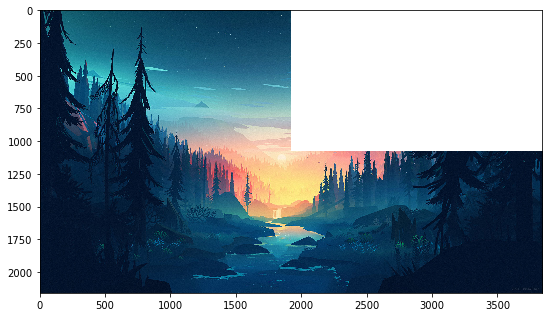

In [154]:
# shuffle
data = separar(objetivo,cuantas)
orden = np.arange(piezas)
random.shuffle(orden)
data = mezclar_unir(data,copy.copy(data), orden)

data = separar(data,cuantas)
posicion_blanco = encontrar_blanco(data,cuadro_blanco)
tablero = copy.copy(unir(data))
orden = (np.arange(piezas)).reshape(cuantas,cuantas)
print(orden)
plt.imshow(tablero)
plt.show()
proceso(orden,objetivo,data, posicion_blanco,cuantas)